In [1]:
# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches

# Enable inline plotting
%matplotlib inline

#from IPython.display import display, Latex, clear_output

In [26]:
import pynrc
pynrc.setup_logging('WARNING')

from astropy.io import fits

pyNRC log messages of level WARNING and above will be shown.
pyNRC log outputs will be directed to the screen.


In [3]:
def save_psf(nrc, p, f, oversample=False, sp=None):
    
    if sp is None:
        sp = pynrc.stellar_spectrum('flat', 10, 'mJy', nrc.bandpass)
    res = nrc.gen_psf(sp=sp, return_oversample=oversample)
    if oversample:
        hdu = fits.PrimaryHDU(res[1])
    else:
        hdu = fits.PrimaryHDU(res)
    
    
    hdr = hdu.header

    hdr['FILTER']  = (nrc.filter, 'Filter Value')

    if nrc._pupil is None:
        hdr['PUPIL']  = ('None', 'Pupil Setting')
    else:
        hdr['PUPIL']  = (nrc.pupil, 'Pupil Setting')
    if nrc._mask is None:
        hdr['MASK']   = ('None', 'Coronagraphic Mask Setting')
    else:
        hdr['MASK']   = (nrc.mask, 'Coronagraphic Mask Setting')
    hdr['MODULE'] = (nrc.module, 'NIRCam Module A or B')
    hdr['FOVPIX'] = (nrc.psf_info['fov_pix'], 'WebbPSF pixel FoV')
    hdr['OSAMP']  = (nrc.psf_info['oversample'], 'WebbPSF pixel oversample')

    opd = nrc.psf_info['opd']
    hdr['PUPILOPD'] = (opd[0], 'Pupil wavefront OPD')
    hdr['OPDSLICE'] = (opd[1], 'OPD slice index')

    jitter = nrc.psf_info['jitter']
    jitter_sigma = nrc.psf_info['jitter_sigma']
    if jitter is None:
        hdr['JITTER'] = ('None', 'Jitter type')
    else:
        hdr['JITTER'] = (jitter, 'Jitter type')
    hdr['JITSIG'] = (jitter_sigma, 'Jitter sigma')

    hdr['SIWFE'] = (nrc.psf_info['include_si_wfe'], 'Was SI WFE included?')

    save_name = '{}_{}'.format(p, f)
    if oversample:
        save_name = save_name + '_oversampled'
    hdu.writeto(save_name+'.fits', overwrite=True)

In [51]:
from pynrc.nrc_utils import S
flatsp = S.FlatSpectrum(10, fluxunits='flam')
# flatsp.convert('photlam')

In [52]:
flatsp.fluxunits

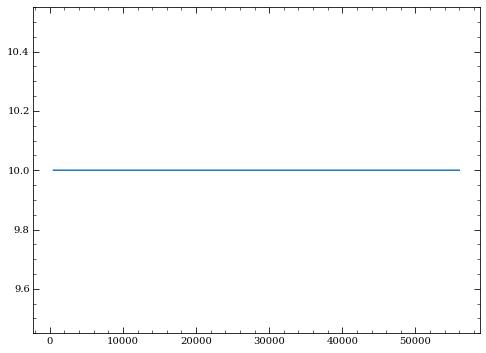

In [53]:
plt.plot(flatsp.wave, flatsp.flux)

In [66]:
# Flat in Flam
sp_flam = S.FlatSpectrum(1, fluxunits='flam')
# Convert to mJy and normalize 10 mJy at 2um
sp_flam.convert('mJy')
sp_flam = (10 / sp_flam.sample(2e4)) * sp_flam 
sp_flam.convert('photlam')

# Flat in Fnu
sp_fnu = S.FlatSpectrum(10, fluxunits='mJy')
sp_fnu.convert('photlam')

In [71]:
pup = 'WLP8'
filt_arr = ['F070W', 'F150W', 'F200W', 'F182M', 'F210M', 'F187N', 'F212N']

pynrc_vals = []

print('Filter Flat Flam   Flat Fnu')
for f in filt_arr:
    nrc = pynrc.NIRCam(filter=f, pupil=pup, fov_pix=201, include_si_wfe=False)
    res1 = nrc.gen_psf(sp=sp_flam, return_oversample=False)
    res2 = nrc.gen_psf(sp=sp_fnu, return_oversample=False)
    print('{} {:10.2f} {:10.2f}'.format(f, res1.sum(), res2.sum()))
    
    pynrc_vals.append(res2.sum())


pup = 'WLP4'
nrc = pynrc.NIRCam(pupil=pup, fov_pix=201, include_si_wfe=False)
res1 = nrc.gen_psf(sp=sp_flam, return_oversample=False)
res2 = nrc.gen_psf(sp=sp_fnu, return_oversample=False)
print('{}  {:10.2f} {:10.2f}'.format(pup, res1.sum(), res2.sum()))

pynrc_vals.append(res2.sum())
pynrc_vals = np.array(pynrc_vals)

Filter Flat Flam   Flat Fnu
F070W   14509.27  116145.70
F150W  171971.94  301430.43
F200W  405361.32  410754.45
F182M  191971.07  225496.03
F210M  190270.27  173488.75
F187N   18335.93   20890.03
F212N   25773.45   22894.65
WLP4    50966.75   44991.38


In [73]:
pandeia_vals = np.array([117317, 307314, 417595, 230058, 175722, 21111, 23063, 47053.])
print(100* (1 - pynrc_vals / pandeia_vals))

[0.99840301 1.91451391 1.63808181 1.98296642 1.27089936 1.04670808
 0.7299437  4.38149154]


In [12]:
pup = 'WLP8'
filt_arr = ['F070W', 'F150W', 'F200W', 'F182M', 'F210M', 'F187N', 'F212N']

for f in filt_arr:
    nrc = pynrc.NIRCam(filter=f, pupil=pup, fov_pix=201, include_si_wfe=False)
    save_psf(nrc, pup, f, sp=sp)
#     save_psf(nrc, pup, f, oversample=True, sp=sp)


[     pynrc:INFO] Initializing SCA 481/A1
[     pynrc:INFO] Updating PSF coeff with fov_pix=201 and oversample=4
[     pynrc:INFO] Initializing SCA 481/A1
[     pynrc:INFO] Updating PSF coeff with fov_pix=201 and oversample=4
[     pynrc:INFO] Initializing SCA 481/A1
[     pynrc:INFO] Updating PSF coeff with fov_pix=201 and oversample=4
[     pynrc:INFO] Initializing SCA 481/A1
[     pynrc:INFO] Updating PSF coeff with fov_pix=201 and oversample=4
[     pynrc:INFO] Initializing SCA 481/A1
[     pynrc:INFO] Updating PSF coeff with fov_pix=201 and oversample=4
[     pynrc:INFO] Initializing SCA 481/A1
[     pynrc:INFO] Updating PSF coeff with fov_pix=201 and oversample=4
[     pynrc:INFO] Initializing SCA 481/A1
[     pynrc:INFO] Updating PSF coeff with fov_pix=201 and oversample=4


In [13]:
pup = 'WLP4'
nrc = pynrc.NIRCam(pupil=pup, fov_pix=201, include_si_wfe=False)
save_psf(nrc, pup, 'None')
save_psf(nrc, pup, f, oversample=True)

[     pynrc:INFO] Initializing SCA 481/A1
[     pynrc:INFO] Updating PSF coeff with fov_pix=201 and oversample=4
